<a href="https://colab.research.google.com/github/BillTanekeu/TP-TPE-INF-3236-Groupe-8/blob/main/Tp5_perceptron_simple_et_multi_couche.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TP5: Perceptron simple et Multi couche 


> **Groupe-8**


* Tanekeu Bill Jordan-------------------------------19M2459

* Ndongo Ndongo Papia Ange Borel--------19M2308

* Ghomsi Sikali Diane Laure---------------------18U2202

* Tchuimo Wamba Jordan------------------------19M2396 

Lien Github:
https://github.com/BillTanekeu/TP-TPE-INF-3236-Groupe-8

representation d'un vecteur unidmentionnel avec numpy


#NEURAL NEWORKS

In [ ]:
import numpy as np
input_vector = np.array([2, 4, 11])
print(input_vector)

[ 2  4 11]


transposition de notre vecteur en un vecteur colonne

In [ ]:
import numpy as np
input_vector = np.array([2, 4, 11])
input_vector = np.array(input_vector, ndmin=2).T
print("The input vector:\n", input_vector)
print("The shape of this vector: ", input_vector.shape)

The input vector:
 [[ 2]
 [ 4]
 [11]]
The shape of this vector:  (3, 1)


initialisation des poids de matrices:avec numpy.ramdom  la valeur des matrices est choisis aleatoirement pour que le choix soit le meilleur possible

In [ ]:
import numpy as np
number_of_samples = 1200
low = -1
high = 0
s = np.random.uniform(low, high, number_of_samples)
# all values of s are within the half open interval [-1, 0) :
print(np.all(s >= -1) and np.all(s < 0))


True


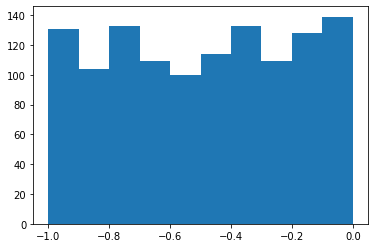

In [ ]:
#histogramme  des echantillons
import matplotlib.pyplot as plt
plt.hist(s)
plt.show()

maintenant appliquons la fonction binomiale de numpy.binomial
il tire des echantillons d'une distribution avec 100 essais et une probabilite de 0.5 de succes 

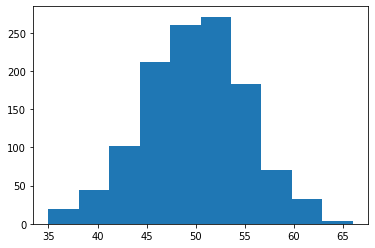

In [ ]:
s = np.random.binomial(100, 0.5, 1200)
plt.hist(s)
plt.show()


le defaut avec notre histogramme est que nous n'avons pas de nombres aleatoires avec une distribution normale bornes avec numpy.random ; pour palier a cela nous allons utiliser scipy.stats

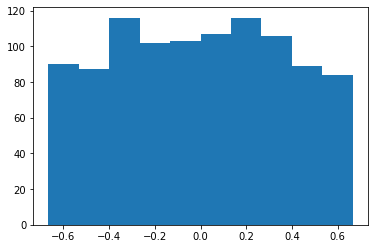

In [ ]:
from scipy.stats import truncnorm
s = truncnorm(a=-2/3., b=2/3., scale=1, loc=0).rvs(size=1000)
plt.hist(s)
plt.show()


on remarque que scipy.stats est difficil a utiliser on utilise alors la fonction truncated_normal

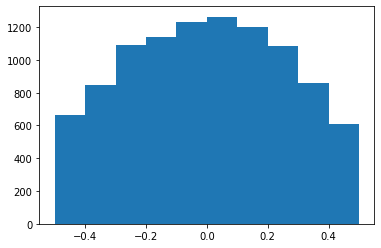

In [ ]:
def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm(
(low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
X = truncated_normal(mean=0, sd=0.4, low=-0.5, upp=0.5)
s = X.rvs(10000)
plt.hist(s)
plt.show()

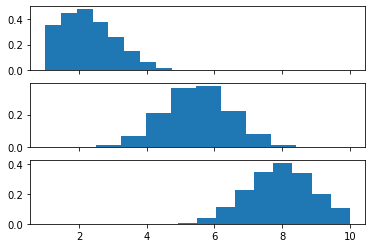

In [ ]:
#autre methodes 
X1 = truncated_normal(mean=2, sd=1, low=1, upp=10)
X2 = truncated_normal(mean=5.5, sd=1, low=1, upp=10)
X3 = truncated_normal(mean=8, sd=1, low=1, upp=10)
import matplotlib.pyplot as plt
fig, ax = plt.subplots(3, sharex=True)
ax[0].hist(X1.rvs(10000), density=True)
ax[1].hist(X2.rvs(10000), density=True)
ax[2].hist(X3.rvs(10000), density=True)
plt.show()


maintenant on cree la matrice de poids des liens  avec truncates_normal a valeur alatoire

In [ ]:
#creation de la matrice "wih"

no_of_input_nodes = 3
no_of_hidden_nodes = 4
rad = 1 / np.sqrt(no_of_input_nodes)
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
wih = X.rvs((no_of_hidden_nodes, no_of_input_nodes))
wih

array([[-0.32839788,  0.22690489,  0.53249265],
       [-0.21123978,  0.35873692,  0.32594956],
       [ 0.51256671, -0.04465704, -0.37952503],
       [ 0.5196379 , -0.16937807,  0.13069145]])

In [ ]:
# matrice de poids "who"
no_of_hidden_nodes = 4
no_of_output_nodes = 2
rad = 1 / np.sqrt(no_of_hidden_nodes) # this is the input in this layer!
X = truncated_normal(mean=2, sd=1, low=-rad, upp=rad)
who = X.rvs((no_of_output_nodes, no_of_hidden_nodes))
who

array([[ 0.30028379,  0.17626455,  0.48870891, -0.23847917],
       [ 0.19792769, -0.04621087, -0.46679605,  0.30037489]])

testons nos poids dans un environnement de reseau  neuronal reel

In [ ]:
import numpy as np
from scipy.stats import truncnorm
def truncated_normal(mean=0, sd=1, low=0, upp=10):
  return truncnorm(
      (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)
class NeuralNetwork:
  def __init__(self,
               no_of_in_nodes,
               no_of_out_nodes,
               no_of_hidden_nodes,
               learning_rate):
    self.no_of_in_nodes = no_of_in_nodes
    self.no_of_out_nodes = no_of_out_nodes
    self.no_of_hidden_nodes = no_of_hidden_nodes
    self.learning_rate = learning_rate
    self.create_weight_matrices()
  def create_weight_matrices(self):
    rad = 1 / np.sqrt(self.no_of_in_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_in_hidden = X.rvs((self.no_of_hidden_nodes,
                                    self.no_of_in_nodes))
    rad = 1 / np.sqrt(self.no_of_hidden_nodes)
    X = truncated_normal(mean=0, sd=1, low=-rad, upp=rad)
    self.weights_hidden_out = X.rvs((self.no_of_out_nodes,
                                  self.no_of_hidden_nodes))
  def train(self):
   pass
  def run(self):
    pass
 

In [ ]:
simple_network = NeuralNetwork(no_of_in_nodes = 3,no_of_out_nodes = 2,
no_of_hidden_nodes = 4,
learning_rate = 0.1)
print(simple_network.weights_in_hidden)
print(simple_network.weights_hidden_out)


[[-0.065527   -0.2139082  -0.30019509]
 [ 0.5096193   0.41776769  0.12907276]
 [ 0.00854035 -0.45934631  0.20262027]
 [-0.22902852  0.35986155  0.51219087]]
[[ 0.02360438  0.10211493 -0.37087907  0.47848704]
 [ 0.39077069  0.38214222  0.3689508   0.0594335 ]]


fonction d'activation sigmoide avec numpy 

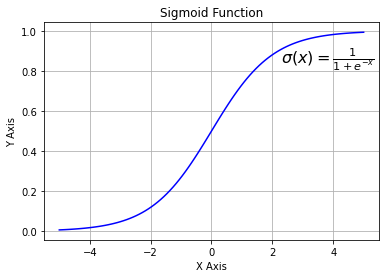

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def sigma(x):
  return 1 / (1 + np.exp(-x))
X = np.linspace(-5, 5, 100)
plt.plot(X, sigma(X),'b')
plt.xlabel('X Axis')
plt.ylabel('Y Axis')
plt.title('Sigmoid Function')
plt.grid()
plt.text(2.3, 0.84, r'$\sigma(x)=\frac{1}{1+e^{-x}}$', fontsize=16)
plt.show()

 on vois  que la fonction sigmoïde mappe un nombre donné x dans la plage de nombres entre 
0 et 1. aussi au fure et a  mesure que la valeur de x augmente, la valeur de la fonction sigmoïde se rapproche de plus en plus de 
1 et à mesure que x diminue, la valeur de la fonction sigmoïde se rapproche de 0
